# mnist using png images from scratch
mnist data set contains 0-9 handwritten iages of 28x28 pixels
Goal of the exercise to do handwriing recognition of these images.

In [149]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [74]:
training_path = './mnist_png/training'
testing_path = './mnist_png/testing'
img_width, img_height = 28, 28
nb_train_samples = 60000
nb_validation_samples = 10000
epochs = 5
batch_size = 128 # change this to 16 to speed up processing by 7 times

In [75]:
input_shape = (img_width, img_height, 1) # 1=grayscale, 3=color image = RGB.

In [76]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [78]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [79]:
data_gen = ImageDataGenerator(rescale=1. / 255)
# data_gen = ImageDataGenerator()
train_batch = data_gen.flow_from_directory(training_path, target_size=(28,28),
                                          batch_size=batch_size, color_mode='grayscale',)
test_batch = data_gen.flow_from_directory(testing_path, target_size=(28,28),
                                         batch_size=batch_size, color_mode='grayscale',)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


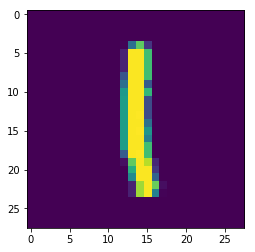

In [150]:
def show_image(image_path):
    pil_im = Image.open(image_path)
    im = pil_im.resize((28,28))
    im1 = np.asarray(im)
    plt.imshow(im1)
    plt.show()

image_path = testing_path + '/1/' + '1008.png'
show_image(image_path)

In [81]:
history = model.fit_generator(
    train_batch,
    steps_per_epoch=nb_train_samples ,
    epochs=epochs,
    validation_data=test_batch,
    validation_steps=nb_validation_samples 
)

model.save('mnist_trained_model.h5')

Epoch 1/5
60000/60000 [==============================] - 1775s - loss: 0.0050 - acc: 0.9986 - val_loss: 0.0909 - val_acc: 0.9932
Epoch 2/5
60000/60000 [==============================] - 1762s - loss: 5.9501e-04 - acc: 0.9999 - val_loss: 0.0761 - val_acc: 0.9941
Epoch 3/5
60000/60000 [==============================] - 1759s - loss: 2.6875e-04 - acc: 1.0000 - val_loss: 0.0762 - val_acc: 0.9941
Epoch 4/5
60000/60000 [==============================] - 1754s - loss: 2.6875e-04 - acc: 1.0000 - val_loss: 0.0762 - val_acc: 0.9941
Epoch 5/5
60000/60000 [==============================] - 1765s - loss: 2.6875e-04 - acc: 1.0000 - val_loss: 0.0762 - val_acc: 0.9941


In [82]:
model = load_model('mnist_trained_model.h5')

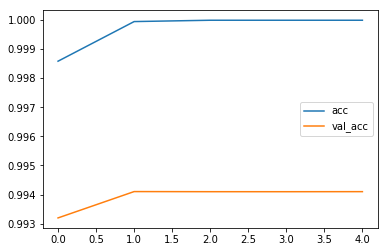

In [84]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()

In [162]:
def predict(image_path):
    pil_im = Image.open(image_path)
    im = pil_im.resize((28,28))
    a1 = np.asarray(im)
    a2 = np.expand_dims(a1, axis=2)
    a3 = np.expand_dims(a2, axis=0)
    result = model.predict_classes(a3)
    return result[0]

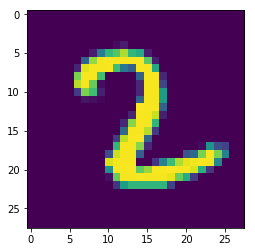

1/1 [==============================] - 0s
Prediction is:  2


In [163]:
# image_path = testing_path + '/3/' + '3120.png'
image_path = testing_path + '/2/' + '2133.png'
show_image(image_path)

r = predict(image_path)
print('Prediction is: ', r)
